## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  71.655249   286.549004  0.807351  5.412353  1.228260
1  57.552629   779.300440  0.956571  2.112028  1.466948
2  58.422469   288.089612  0.777196  6.861315  1.171859
3  55.943502  1361.172116  0.237717  1.191750  1.335185
4  18.373207   940.105888  0.500097  3.484625  1.496451


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 0.9822597	total: 55.5ms	remaining: 55.5s
1:	learn: 0.9727491	total: 57.6ms	remaining: 28.7s
2:	learn: 0.9650865	total: 58.6ms	remaining: 19.5s
3:	learn: 0.9564513	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9469974	total: 60.5ms	remaining: 12s
5:	learn: 0.9380351	total: 61.6ms	remaining: 10.2s
6:	learn: 0.9307569	total: 62.6ms	remaining: 8.89s
7:	learn: 0.9211302	total: 63.7ms	remaining: 7.9s
8:	learn: 0.9141612	total: 65.2ms	remaining: 7.18s
9:	learn: 0.9037649	total: 67.3ms	remaining: 6.67s
10:	learn: 0.8935424	total: 68.1ms	remaining: 6.12s
11:	learn: 0.8843619	total: 68.8ms	remaining: 5.66s
12:	learn: 0.8735147	total: 71.3ms	remaining: 5.41s
13:	learn: 0.8646300	total: 72.1ms	remaining: 5.08s
14:	learn: 0.8550133	total: 72.9ms	remaining: 4.79s
15:	learn: 0.8469211	total: 73.9ms	remaining: 4.54s
16:	learn: 0.8380144	total: 74.9ms	remaining: 4.33s
17:	learn: 0.8302470	total: 76ms	remaining: 4.14s
18:	learn: 0.8212694	total: 77ms	remaining: 3.98s
19:	learn: 0.8131597	total: 7

112:	learn: 0.3695336	total: 167ms	remaining: 1.31s
113:	learn: 0.3670797	total: 167ms	remaining: 1.3s
114:	learn: 0.3644877	total: 168ms	remaining: 1.29s
115:	learn: 0.3614826	total: 169ms	remaining: 1.29s
116:	learn: 0.3584765	total: 170ms	remaining: 1.28s
117:	learn: 0.3558671	total: 171ms	remaining: 1.27s
118:	learn: 0.3534238	total: 171ms	remaining: 1.27s
119:	learn: 0.3509258	total: 172ms	remaining: 1.26s
120:	learn: 0.3485193	total: 173ms	remaining: 1.26s
121:	learn: 0.3463095	total: 174ms	remaining: 1.25s
122:	learn: 0.3437771	total: 174ms	remaining: 1.24s
123:	learn: 0.3415716	total: 175ms	remaining: 1.24s
124:	learn: 0.3389469	total: 176ms	remaining: 1.23s
125:	learn: 0.3366168	total: 176ms	remaining: 1.22s
126:	learn: 0.3340792	total: 177ms	remaining: 1.22s
127:	learn: 0.3310953	total: 178ms	remaining: 1.21s
128:	learn: 0.3293466	total: 178ms	remaining: 1.2s
129:	learn: 0.3272163	total: 179ms	remaining: 1.2s
130:	learn: 0.3250486	total: 180ms	remaining: 1.19s
131:	learn: 0.3

152:	learn: 0.2825691	total: 213ms	remaining: 1.18s
153:	learn: 0.2805754	total: 215ms	remaining: 1.18s
154:	learn: 0.2789466	total: 217ms	remaining: 1.18s
155:	learn: 0.2776496	total: 217ms	remaining: 1.18s
156:	learn: 0.2758932	total: 218ms	remaining: 1.17s
157:	learn: 0.2742215	total: 219ms	remaining: 1.17s
158:	learn: 0.2724193	total: 221ms	remaining: 1.17s
159:	learn: 0.2707972	total: 222ms	remaining: 1.16s
160:	learn: 0.2694299	total: 223ms	remaining: 1.16s
161:	learn: 0.2679585	total: 224ms	remaining: 1.16s
162:	learn: 0.2661692	total: 225ms	remaining: 1.16s
163:	learn: 0.2645424	total: 226ms	remaining: 1.15s
164:	learn: 0.2632304	total: 227ms	remaining: 1.15s
165:	learn: 0.2615306	total: 228ms	remaining: 1.14s
166:	learn: 0.2596021	total: 229ms	remaining: 1.14s
167:	learn: 0.2581030	total: 229ms	remaining: 1.14s
168:	learn: 0.2565627	total: 230ms	remaining: 1.13s
169:	learn: 0.2550985	total: 231ms	remaining: 1.13s
170:	learn: 0.2534319	total: 231ms	remaining: 1.12s
171:	learn: 

309:	learn: 0.1231541	total: 322ms	remaining: 716ms
310:	learn: 0.1225002	total: 323ms	remaining: 716ms
311:	learn: 0.1218739	total: 324ms	remaining: 714ms
312:	learn: 0.1214222	total: 324ms	remaining: 712ms
313:	learn: 0.1204428	total: 325ms	remaining: 711ms
314:	learn: 0.1198573	total: 326ms	remaining: 708ms
315:	learn: 0.1194052	total: 326ms	remaining: 707ms
316:	learn: 0.1184622	total: 327ms	remaining: 705ms
317:	learn: 0.1177021	total: 328ms	remaining: 703ms
318:	learn: 0.1170374	total: 328ms	remaining: 701ms
319:	learn: 0.1167487	total: 329ms	remaining: 699ms
320:	learn: 0.1161025	total: 330ms	remaining: 697ms
321:	learn: 0.1155526	total: 330ms	remaining: 696ms
322:	learn: 0.1150172	total: 331ms	remaining: 694ms
323:	learn: 0.1143563	total: 332ms	remaining: 693ms
324:	learn: 0.1139134	total: 333ms	remaining: 691ms
325:	learn: 0.1132925	total: 333ms	remaining: 689ms
326:	learn: 0.1126517	total: 334ms	remaining: 687ms
327:	learn: 0.1120496	total: 335ms	remaining: 686ms
328:	learn: 

379:	learn: 0.0885389	total: 369ms	remaining: 602ms
380:	learn: 0.0880155	total: 371ms	remaining: 603ms
381:	learn: 0.0875842	total: 372ms	remaining: 602ms
382:	learn: 0.0872401	total: 373ms	remaining: 600ms
383:	learn: 0.0867869	total: 373ms	remaining: 599ms
384:	learn: 0.0864212	total: 374ms	remaining: 597ms
385:	learn: 0.0859446	total: 374ms	remaining: 596ms
386:	learn: 0.0854505	total: 375ms	remaining: 594ms
387:	learn: 0.0850135	total: 376ms	remaining: 592ms
388:	learn: 0.0846437	total: 376ms	remaining: 591ms
389:	learn: 0.0841686	total: 377ms	remaining: 590ms
390:	learn: 0.0838116	total: 378ms	remaining: 588ms
391:	learn: 0.0834010	total: 378ms	remaining: 586ms
392:	learn: 0.0829619	total: 379ms	remaining: 585ms
393:	learn: 0.0825631	total: 379ms	remaining: 583ms
394:	learn: 0.0822937	total: 380ms	remaining: 582ms
395:	learn: 0.0819052	total: 381ms	remaining: 581ms
396:	learn: 0.0815258	total: 381ms	remaining: 579ms
397:	learn: 0.0811705	total: 382ms	remaining: 578ms
398:	learn: 

548:	learn: 0.0413182	total: 482ms	remaining: 396ms
549:	learn: 0.0411245	total: 483ms	remaining: 395ms
550:	learn: 0.0409354	total: 484ms	remaining: 394ms
551:	learn: 0.0407785	total: 484ms	remaining: 393ms
552:	learn: 0.0405914	total: 485ms	remaining: 392ms
553:	learn: 0.0404081	total: 486ms	remaining: 391ms
554:	learn: 0.0402245	total: 486ms	remaining: 390ms
555:	learn: 0.0400718	total: 487ms	remaining: 389ms
556:	learn: 0.0399029	total: 488ms	remaining: 388ms
557:	learn: 0.0397679	total: 488ms	remaining: 387ms
558:	learn: 0.0396609	total: 489ms	remaining: 386ms
559:	learn: 0.0395139	total: 490ms	remaining: 385ms
560:	learn: 0.0393434	total: 490ms	remaining: 384ms
561:	learn: 0.0392122	total: 491ms	remaining: 383ms
562:	learn: 0.0390463	total: 491ms	remaining: 381ms
563:	learn: 0.0389175	total: 492ms	remaining: 380ms
564:	learn: 0.0387207	total: 493ms	remaining: 379ms
565:	learn: 0.0385279	total: 494ms	remaining: 379ms
566:	learn: 0.0384032	total: 494ms	remaining: 378ms
567:	learn: 

617:	learn: 0.0311309	total: 529ms	remaining: 327ms
618:	learn: 0.0310516	total: 530ms	remaining: 326ms
619:	learn: 0.0309589	total: 531ms	remaining: 325ms
620:	learn: 0.0308812	total: 532ms	remaining: 325ms
621:	learn: 0.0307743	total: 532ms	remaining: 324ms
622:	learn: 0.0306960	total: 533ms	remaining: 322ms
623:	learn: 0.0306201	total: 534ms	remaining: 322ms
624:	learn: 0.0304863	total: 534ms	remaining: 321ms
625:	learn: 0.0303947	total: 535ms	remaining: 320ms
626:	learn: 0.0303214	total: 536ms	remaining: 319ms
627:	learn: 0.0302146	total: 536ms	remaining: 318ms
628:	learn: 0.0301245	total: 537ms	remaining: 317ms
629:	learn: 0.0300314	total: 537ms	remaining: 316ms
630:	learn: 0.0299856	total: 538ms	remaining: 315ms
631:	learn: 0.0298833	total: 539ms	remaining: 314ms
632:	learn: 0.0297954	total: 539ms	remaining: 313ms
633:	learn: 0.0297153	total: 540ms	remaining: 312ms
634:	learn: 0.0296252	total: 541ms	remaining: 311ms
635:	learn: 0.0294970	total: 541ms	remaining: 310ms
636:	learn: 

760:	learn: 0.0200173	total: 639ms	remaining: 201ms
761:	learn: 0.0199656	total: 640ms	remaining: 200ms
762:	learn: 0.0199556	total: 641ms	remaining: 199ms
763:	learn: 0.0199061	total: 642ms	remaining: 198ms
764:	learn: 0.0198475	total: 643ms	remaining: 197ms
765:	learn: 0.0198102	total: 643ms	remaining: 196ms
766:	learn: 0.0198006	total: 644ms	remaining: 196ms
767:	learn: 0.0197861	total: 644ms	remaining: 195ms
768:	learn: 0.0196977	total: 645ms	remaining: 194ms
769:	learn: 0.0196409	total: 645ms	remaining: 193ms
770:	learn: 0.0196267	total: 646ms	remaining: 192ms
771:	learn: 0.0195809	total: 647ms	remaining: 191ms
772:	learn: 0.0195335	total: 648ms	remaining: 190ms
773:	learn: 0.0195195	total: 650ms	remaining: 190ms
774:	learn: 0.0194884	total: 652ms	remaining: 189ms
775:	learn: 0.0194333	total: 654ms	remaining: 189ms
776:	learn: 0.0194197	total: 655ms	remaining: 188ms
777:	learn: 0.0193648	total: 657ms	remaining: 187ms
778:	learn: 0.0193307	total: 658ms	remaining: 187ms
779:	learn: 

812:	learn: 0.0179814	total: 686ms	remaining: 158ms
813:	learn: 0.0179055	total: 688ms	remaining: 157ms
814:	learn: 0.0178938	total: 690ms	remaining: 157ms
815:	learn: 0.0178663	total: 691ms	remaining: 156ms
816:	learn: 0.0178288	total: 692ms	remaining: 155ms
817:	learn: 0.0178055	total: 694ms	remaining: 154ms
818:	learn: 0.0177726	total: 695ms	remaining: 154ms
819:	learn: 0.0177497	total: 696ms	remaining: 153ms
820:	learn: 0.0177180	total: 696ms	remaining: 152ms
821:	learn: 0.0176885	total: 697ms	remaining: 151ms
822:	learn: 0.0176344	total: 698ms	remaining: 150ms
823:	learn: 0.0176113	total: 698ms	remaining: 149ms
824:	learn: 0.0175670	total: 699ms	remaining: 148ms
825:	learn: 0.0175597	total: 700ms	remaining: 147ms
826:	learn: 0.0174880	total: 700ms	remaining: 146ms
827:	learn: 0.0174522	total: 701ms	remaining: 146ms
828:	learn: 0.0174275	total: 701ms	remaining: 145ms
829:	learn: 0.0173576	total: 702ms	remaining: 144ms
830:	learn: 0.0173225	total: 703ms	remaining: 143ms
831:	learn: 

977:	learn: 0.0111162	total: 800ms	remaining: 18ms
978:	learn: 0.0110819	total: 802ms	remaining: 17.2ms
979:	learn: 0.0110620	total: 803ms	remaining: 16.4ms
980:	learn: 0.0110427	total: 803ms	remaining: 15.6ms
981:	learn: 0.0110032	total: 804ms	remaining: 14.7ms
982:	learn: 0.0109819	total: 805ms	remaining: 13.9ms
983:	learn: 0.0109631	total: 805ms	remaining: 13.1ms
984:	learn: 0.0109079	total: 806ms	remaining: 12.3ms
985:	learn: 0.0108736	total: 807ms	remaining: 11.5ms
986:	learn: 0.0108527	total: 807ms	remaining: 10.6ms
987:	learn: 0.0108040	total: 808ms	remaining: 9.81ms
988:	learn: 0.0107505	total: 809ms	remaining: 8.99ms
989:	learn: 0.0107031	total: 809ms	remaining: 8.18ms
990:	learn: 0.0106516	total: 810ms	remaining: 7.36ms
991:	learn: 0.0106379	total: 811ms	remaining: 6.54ms
992:	learn: 0.0106303	total: 812ms	remaining: 5.72ms
993:	learn: 0.0106168	total: 812ms	remaining: 4.9ms
994:	learn: 0.0105708	total: 813ms	remaining: 4.08ms
995:	learn: 0.0105631	total: 814ms	remaining: 3.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.45901297815825376


ABC Pre-generator MAE 0.4831981399927687


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

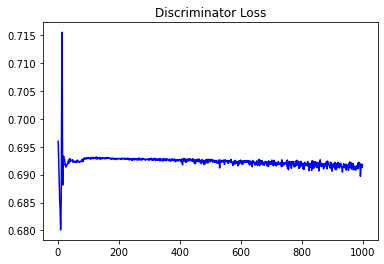

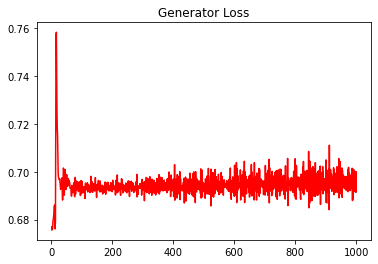

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.43490305989421907


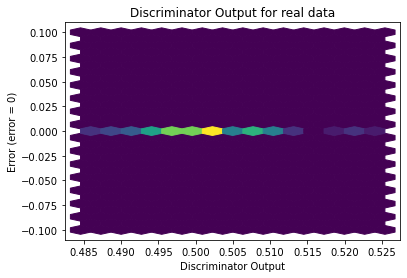

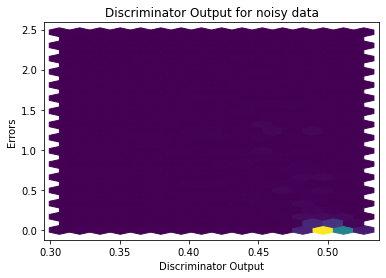

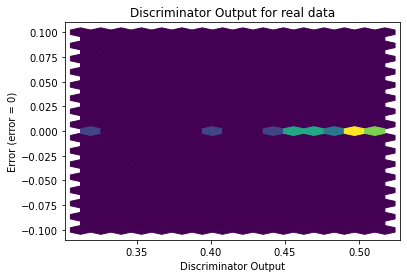

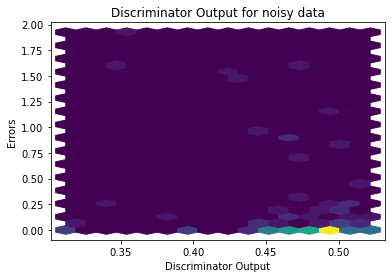

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

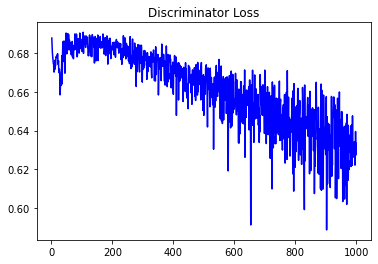

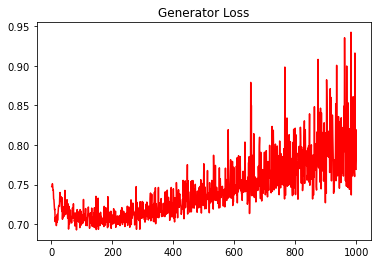

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5131899525560438


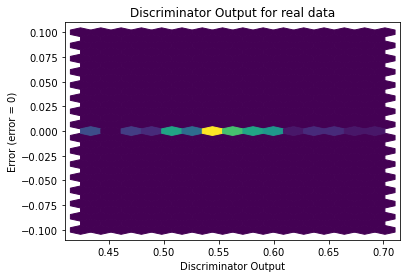

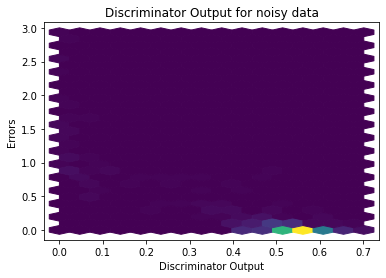

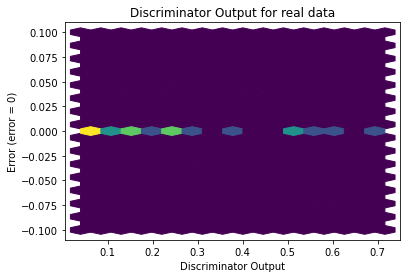

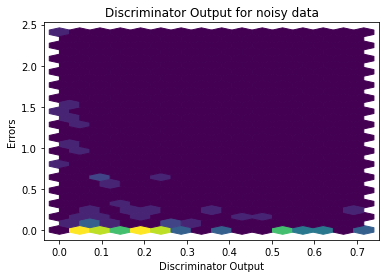

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


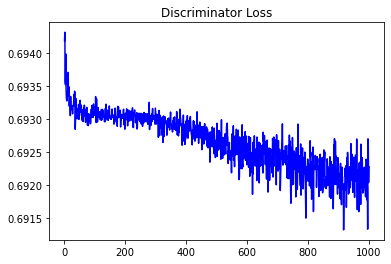

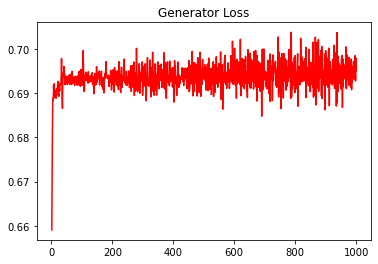

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4298882657177746


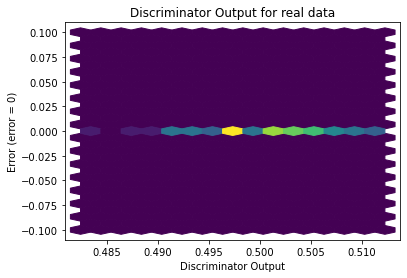

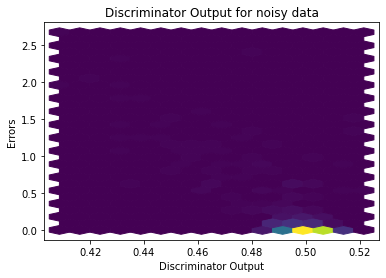

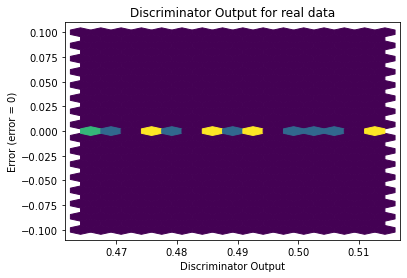

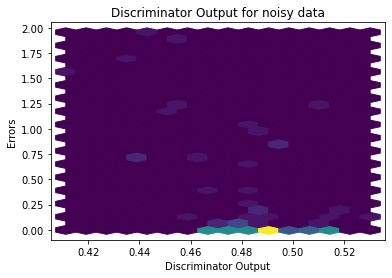

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


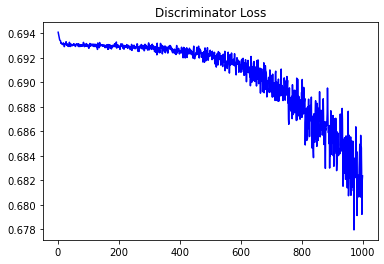

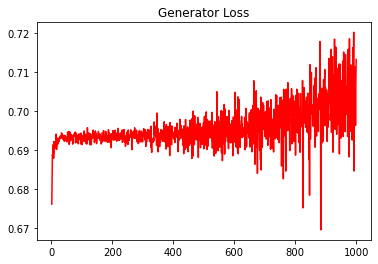

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.4678539016013965


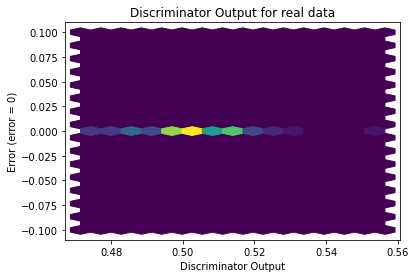

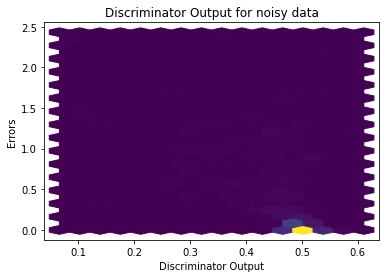

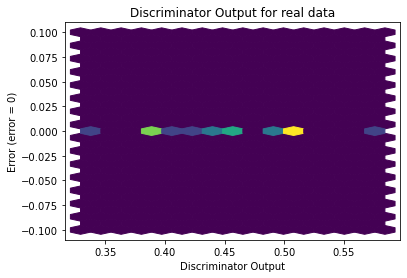

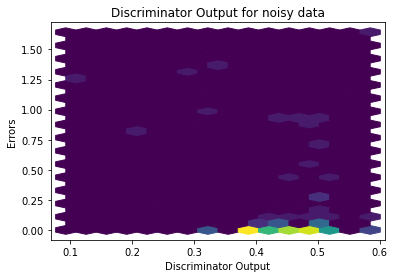

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1404]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0442]], requires_grad=True)
